<a href="https://colab.research.google.com/github/Nazzy147/EmployeeSalaryPredictor/blob/main/Employee_salary_predictor_IBM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/adult 3.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#to display no. of ros and cols
data.shape

(48842, 15)

In [ ]:
#to display default 1st 5 rows
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#to display last 5 rows
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
#to find  null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#to retreive all the null vals under each col
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
gender
Male      32650
Female    16192
Name: count, dtype: int64


In [ ]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [ ]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [ ]:
print(data['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
#replacing ? with 'others'
data.occupation.replace({'?':'Others'},inplace=True)

/tmp/ipython-input-18-3134641590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [ ]:
print(data.occupation.replace({'?':'Others'},inplace=True))

None


In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.workclass.replace({'?':'NotListed'},inplace=True)

/tmp/ipython-input-22-2835487482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'NotListed'},inplace=True)


In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

In [ ]:
data = data[data['education']!='5th-6th']
data = data[data['education']!='1st-4th']
data = data[data['education']!='Preschool']

In [ ]:
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [ ]:
data.shape

(47972, 15)

In [ ]:
#redundancy
data.drop(columns = ['education'], inplace=True)
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


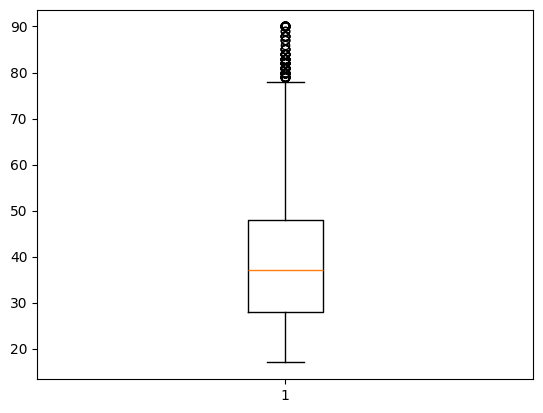

In [ ]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

In [ ]:
#outliers removed
data = data[(data['age']<=75)&(data['age']>=17)]

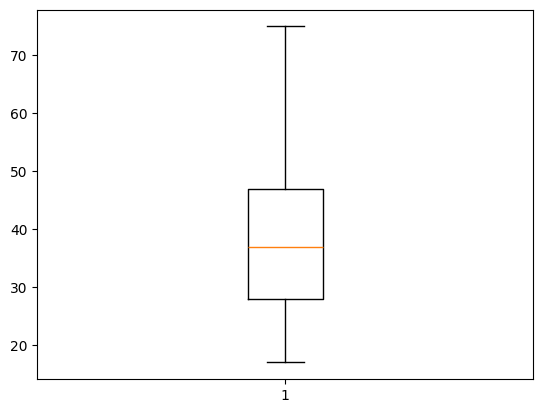

In [ ]:
plt.boxplot(data['age'])
plt.show()

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])  #farming 0, sales 1, armed forces 2
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])

data

/tmp/ipython-input-36-584585944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass']=encoder.fit_transform(data['workclass'])
/tmp/ipython-input-36-584585944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status']=encoder.fit_transform(data['marital-status'])
/tmp/ipython-input-36-584585944.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [ ]:
x =data.drop(columns=['income'])
y=data['income']

In [ ]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [ ]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)
xtrain

array([[0.44827586, 0.5       , 0.10248458, ..., 0.        , 0.39795918,
        0.95121951],
       [0.17241379, 0.16666667, 0.08567128, ..., 0.        , 0.34693878,
        0.95121951],
       [0.75862069, 0.83333333, 0.11752469, ..., 0.        , 0.39795918,
        0.04878049],
       ...,
       [0.0862069 , 0.66666667, 0.24567574, ..., 0.        , 0.39795918,
        0.85365854],
       [0.53448276, 0.5       , 0.14505705, ..., 0.        , 0.39795918,
        0.95121951],
       [0.01724138, 0.5       , 0.0515217 , ..., 0.        , 0.35714286,
        0.95121951]])

In [ ]:
# machine learning algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)  #input and output training data
predict=knn.predict(xtest) #predicting using testing data
predict   # predicted value

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict)

0.8167786644267114

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
predict1=lr.predict(xtest)
predict1

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict1)

0.8197186056278875

In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam',hidden_layer_sizes=(5,2), random_state=2, max_iter=2000)
clf.fit(xtrain, ytrain)
predict2=clf.predict(xtest)
predict2

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, predict2)

0.8391432171356573

In [ ]:
# machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
model = RandomForestClassifier(random_state=2)
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=2)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluation
y_pred = model.predict(xtest)
print("\n✅ Accuracy:", accuracy_score(ytest, y_pred))
print("\n✅ Classification Report:\n", classification_report(ytest, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(ytest, y_pred))


✅ Accuracy: 0.8506929861402772

✅ Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7206
        >50K       0.72      0.63      0.67      2318

    accuracy                           0.85      9524
   macro avg       0.80      0.77      0.79      9524
weighted avg       0.85      0.85      0.85      9524


✅ Confusion Matrix:
 [[6649  557]
 [ 865 1453]]


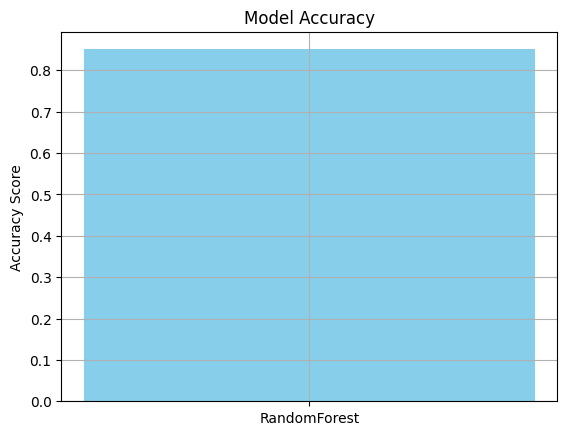

In [ ]:
# Visualization - Accuracy Bar Chart
results = {'RandomForest': accuracy_score(ytest, y_pred)}
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy')
plt.grid(True)
plt.show()

📌 Predict Salary from User Inputs via Console

In [ ]:
print("\n🔎 Enter Employee Details to Predict Salary Group\n")

# Get inputs from the user
age = int(input("Enter age (18–90): "))
workclass = int(input("Enter workclass code (e.g., Private=4, Self-emp-not-inc=6, Other=8): "))
fnlwgt = int(input("Enter final weight (e.g., 10000–1000000): "))
edu_num = int(input("Enter education number (1–16): "))
marital_status = int(input("Enter marital status code (e.g., Never-married=4, Married-civ-spouse=2): "))
occupation = int(input("Enter occupation code (e.g., Exec-managerial=3, Other=12): "))
relationship = int(input("Enter relationship code (e.g., Husband=0, Own-child=1): "))
race = int(input("Enter race code (e.g., White=4, Black=0, Other=3): "))
gender = int(input("Enter gender (Male=1, Female=0): "))
capital_gain = int(input("Enter capital gain: "))
capital_loss = int(input("Enter capital loss: "))
hours_per_week = int(input("Enter hours worked per week: "))
native_country = int(input("Enter native country code (e.g., United-States=38, Other=0): "))

# Create a DataFrame with user input
user_input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'fnlwgt': [fnlwgt],
    'educational-num': [edu_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

# Convert the user input DataFrame to a numpy array
user_input_array = user_input_df.to_numpy()

# Make prediction
prediction = model.predict(user_input_array)
result = '>50K' if prediction[0] == 1 else '<=50K'

print("\n✅ The predicted salary group is:", result)


🔎 Enter Employee Details to Predict Salary Group

Enter age (18–90): 20
Enter workclass code (e.g., Private=4, Self-emp-not-inc=6, Other=8): 4
Enter final weight (e.g., 10000–1000000): 10009
Enter education number (1–16): 8
Enter marital status code (e.g., Never-married=4, Married-civ-spouse=2): 4
Enter occupation code (e.g., Exec-managerial=3, Other=12): 3
Enter relationship code (e.g., Husband=0, Own-child=1): 0
Enter race code (e.g., White=4, Black=0, Other=3): 0
Enter gender (Male=1, Female=0): 0
Enter capital gain: 900021
Enter capital loss: 304
Enter hours worked per week: 3
Enter native country code (e.g., United-States=38, Other=0): 0

✅ The predicted salary group is: <=50K


In [ ]:
# 📌 STEP 10: Save the Best Model
import joblib
joblib.dump(model, "best_model.pkl")
print("\n🎯 Saved the trained Random Forest model as best_model.pkl")


🎯 Saved the trained Random Forest model as best_model.pkl


In [ ]:
from google.colab import files
files.download("best_model.pkl")
print("\n Downloaded successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Downloaded successfully!
